# Q6: Improve Performance (20 pts)

Many techniques have been proposed in the literature to improve classification performance for deep networks. In this section, we try to use a recently proposed technique called [mixup](https://arxiv.org/abs/1710.09412). The main idea is to augment the training set with linear combinations of images and labels. Read through the paper and modify your model to implement mixup. Report your performance, along with training/test curves, and comparison with baseline in the report.

In [1]:
# implement mixup regularization here and show performance
import torch
from utils import ARGS
import nbimporter
from q6_utils import train
from q4_imagenet_finetune_pascal import PretrainedResNet
from resnet import ResNet
from q2_caffenet_pascal import CaffeNet


## Pre-trained resnet

In [2]:
args = ARGS(batch_size=64, epochs=10, lr=0.0001, save_at_end=True, \
            save_freq=10, use_cuda=True, val_every=100, gamma=0.5, step_size=2, log_every=100)
model = PretrainedResNet()
optimizer = torch.optim.Adam(model.parameters(), args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, args.step_size, args.gamma)
test_ap, test_map = train(args, model, optimizer, scheduler, 'resnet18_pretrained_mixup')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.691422
Train Epoch: 1 [100 (27%)]	Loss: 0.111653
Train Epoch: 2 [200 (53%)]	Loss: 0.110398
Train Epoch: 3 [300 (80%)]	Loss: 0.087299
Train Epoch: 5 [400 (6%)]	Loss: 0.056296
Train Epoch: 6 [500 (33%)]	Loss: 0.053700
Train Epoch: 7 [600 (59%)]	Loss: 0.061616
Train Epoch: 8 [700 (86%)]	Loss: 0.049949
test map: 0.8358738446542814


### Test map vs iteration
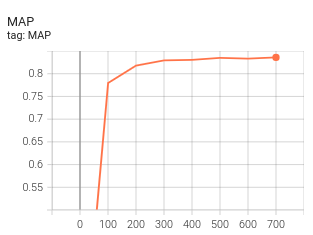

### Training loss vs iteration
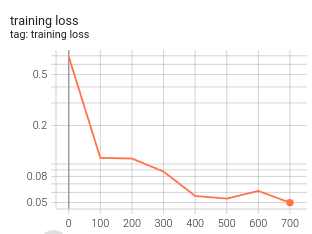

### lr vs iteration
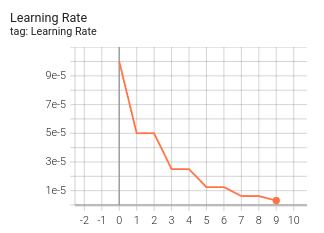

#### final map without mixup = 0.7485, with mixup 0.8387

## Resnet scratch

In [2]:
args = ARGS(batch_size=64, epochs=50, lr=0.001, save_at_end=True, \
            save_freq=50, use_cuda=True, val_every=250, gamma=0.2, step_size=10)
model = ResNet()
optimizer = torch.optim.Adam(model.parameters(), args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, args.step_size, args.gamma)
test_ap, test_map = train(args, model, optimizer, scheduler, 'resnet_scratch_mixup')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.768416
Train Epoch: 1 [100 (27%)]	Loss: 0.222269
Train Epoch: 2 [200 (53%)]	Loss: 0.224068
Train Epoch: 3 [300 (80%)]	Loss: 0.211722
Train Epoch: 5 [400 (6%)]	Loss: 0.217208
Train Epoch: 6 [500 (33%)]	Loss: 0.194764
Train Epoch: 7 [600 (59%)]	Loss: 0.223388
Train Epoch: 8 [700 (86%)]	Loss: 0.247940
Train Epoch: 10 [800 (13%)]	Loss: 0.162076
Train Epoch: 11 [900 (39%)]	Loss: 0.176556
Train Epoch: 12 [1000 (66%)]	Loss: 0.230983
Train Epoch: 13 [1100 (92%)]	Loss: 0.141811
Train Epoch: 15 [1200 (19%)]	Loss: 0.155055
Train Epoch: 16 [1300 (46%)]	Loss: 0.236883
Train Epoch: 17 [1400 (72%)]	Loss: 0.194826
Train Epoch: 18 [1500 (99%)]	Loss: 0.148982
Train Epoch: 20 [1600 (25%)]	Loss: 0.137758
Train Epoch: 21 [1700 (52%)]	Loss: 0.109818
Train Epoch: 22 [1800 (78%)]	Loss: 0.224005
Train Epoch: 24 [1900 (5%)]	Loss: 0.122144
Train Epoch: 25 [2000 (32%)]	Loss: 0.196529
Train Epoch: 26 [2100 (58%)]	Loss: 0.108749
Train Epoch: 27 [2200 (85%)]	Loss: 0.109581
Train Epoch

### test map vs iteration
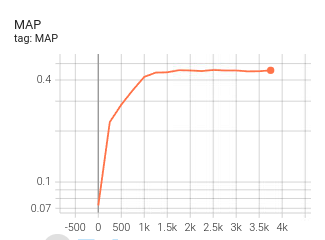

### train loss vs iteration
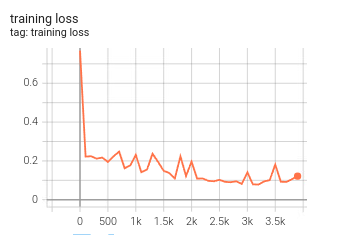

### learning rate vs epoch
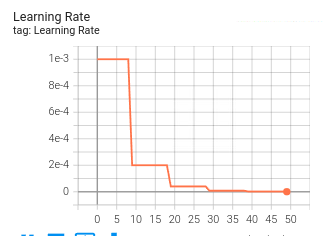

## Caffenet scratch

In [2]:
args = ARGS(batch_size=32, epochs=50,lr=0.0001, save_at_end=True, \
            save_freq=20, use_cuda=True, val_every=250, step_size=5, gamma=0.8)
model = CaffeNet()
optimizer = torch.optim.Adam(model.parameters(), args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, args.step_size, args.gamma)
test_ap, test_map = train(args, model, optimizer, scheduler, 'caffenet_mixup')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.693204
Train Epoch: 0 [100 (64%)]	Loss: 0.281435
Train Epoch: 1 [200 (27%)]	Loss: 0.250984
Train Epoch: 1 [300 (91%)]	Loss: 0.276004
Train Epoch: 2 [400 (55%)]	Loss: 0.233724
Train Epoch: 3 [500 (18%)]	Loss: 0.236591
Train Epoch: 3 [600 (82%)]	Loss: 0.228916
Train Epoch: 4 [700 (46%)]	Loss: 0.261812
Train Epoch: 5 [800 (10%)]	Loss: 0.237398
Train Epoch: 5 [900 (73%)]	Loss: 0.206168
Train Epoch: 6 [1000 (37%)]	Loss: 0.243423
Train Epoch: 7 [1100 (1%)]	Loss: 0.217701
Train Epoch: 7 [1200 (64%)]	Loss: 0.223154
Train Epoch: 8 [1300 (28%)]	Loss: 0.226751
Train Epoch: 8 [1400 (92%)]	Loss: 0.204041
Train Epoch: 9 [1500 (55%)]	Loss: 0.204400
Train Epoch: 10 [1600 (19%)]	Loss: 0.208899
Train Epoch: 10 [1700 (83%)]	Loss: 0.206577
Train Epoch: 11 [1800 (46%)]	Loss: 0.171006
Train Epoch: 12 [1900 (10%)]	Loss: 0.226879
Train Epoch: 12 [2000 (74%)]	Loss: 0.174719
Train Epoch: 13 [2100 (38%)]	Loss: 0.220328
Train Epoch: 14 [2200 (1%)]	Loss: 0.186300
Train Epoch: 14 [23

### test map vs iter


### train loss vs iter


### lr vs iter
